# Librerías

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Diccionario

In [57]:
import pandas as pd

# Leer el archivo Excel
df_diccionarios = pd.read_excel('./files/envi_2020_fd.xlsx')

# Inicializar el diccionario para almacenar las secciones y preguntas
diccionario_secciones = {}
seccion_actual = None

# Recorrer el DataFrame fila por fila
for index, row in df_diccionarios.iterrows():
    # Identificar las filas que contienen 'SECCIÓN'
    if isinstance(row[1], str) and 'SECCIÓN' in row[1]:
        seccion_actual = row[1].strip()
        diccionario_secciones[seccion_actual] = []
    # Si estamos dentro de una sección, añadir las preguntas y nemónicos, excluyendo los encabezados y [1] y [2]
    elif seccion_actual and isinstance(row[1], str) and row[1].strip() not in ["Pregunta", "Nemónico", "[1]", "[2]"]:
        pregunta = row[1].strip() if isinstance(row[1], str) else ''
        nemonico = row[2].strip() if isinstance(row[2], str) else ''
        if pregunta and nemonico:
            diccionario_secciones[seccion_actual].append((pregunta, nemonico))

# Guardar el diccionario en un archivo JSON
output_file = './processed_files/diccionario_secciones.json'
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(diccionario_secciones, f, ensure_ascii=False, indent=4)

print(f"El diccionario ha sido guardado en {output_file}")


El diccionario ha sido guardado en ./processed_files/diccionario_secciones.json


---

# Archivos importantes

In [58]:
# Ruta archivos
ruta = './files/envi_2020_base_de_datos_csv/Bases de datos'
# Archivos
df_TVIVIENDA = pd.read_csv(ruta + '/TVIVIENDA.csv')
df_TSDEM = pd.read_csv(ruta + '/TSDEM.csv')

---

# Evaluación de NaNs en variables seleccionadas

   P5_43_4_1  P5_30_4_1
0        NaN        NaN
1        NaN        NaN
2        NaN        NaN
3        NaN        NaN
4        NaN        NaN
Before cleaning: 55147 rows and after cleaning: 1641 rows
Variables after cleaning: 
2000.0     147
1000.0     127
3000.0     113
5000.0     104
1500.0      88
          ... 
11500.0      1
130.0        1
11100.0      1
375.0        1
630.0        1
Name: P5_43_4_1, Length: 139, dtype: int64
Before cleaning: 1641 rows and after cleaning: 1641 rows
Variables after cleaning: 
2000.0      181
5000.0      145
3000.0      140
1000.0      102
1500.0       82
           ... 
10500.0       1
27000.0       1
600000.0      1
180.0         1
630.0         1
Name: P5_30_4_1, Length: 129, dtype: int64


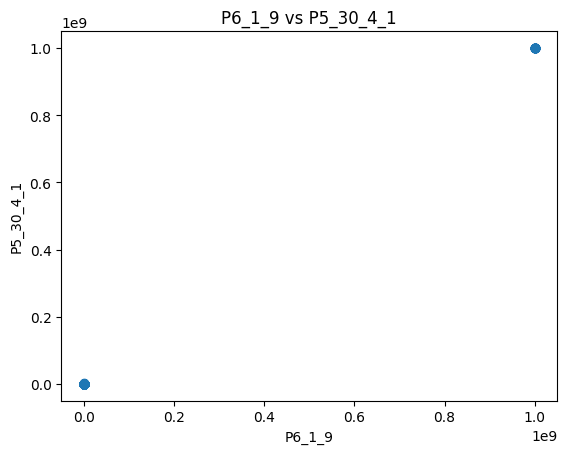

In [86]:
questions_to_evaluate = [
    "P4_4",
    "P4_5",
    "P4_6",
    "P4_13",
    "P4_14",
    "P4_15",
    "P4_16",
    "P4_10",
    "P4_10A",
    "P4_20_1",
    "P4_21_1",
    "P6_5_1",
    "P6_5_2",
    "P6_5_3",
    "P4_22_5",
    "P4_22_7",
    "P4_22_8"
]

questions_cicle = [
    "P5_43_4_1",
    "P5_30_4_1",
]
TVIVIENDA_questions = []
cicle_questions = []
none_questions = []


########### CORRELATION QUESTIONS #########
for question in questions_to_evaluate:
    if question in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        TVIVIENDA_questions.append(df_TVIVIENDA[question])
    if question not in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        none_questions.append(question)

# # Count nans for question in every column in the df that matches the question
# for i in range(len(TVIVIENDA_questions)):
#     print(f"Question: {questions_to_evaluate[i]}")
#     print(TVIVIENDA_questions[i].isna().sum())
#     print("")

# Build a DataFrame with the TVIVIENDA questions
df_TVIVIENDA_questions = pd.DataFrame()
for i in range(len(TVIVIENDA_questions)):
    df_TVIVIENDA_questions[questions_to_evaluate[i]] = TVIVIENDA_questions[i]

##### CIRCLE QUESTIONS #####
for question in questions_cicle:
    if question in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        cicle_questions.append(df_TVIVIENDA[question])

df_circle_questions = pd.DataFrame()
for i in range(len(cicle_questions)):
    df_circle_questions[questions_cicle[i]] = cicle_questions[i]

print(df_circle_questions.head())

prev_clean_first_q = len(df_circle_questions['P5_43_4_1'])
df_circle_questions = df_circle_questions.dropna()
post_clean = len(df_circle_questions['P5_43_4_1'])
post_clean_variables = df_circle_questions['P5_43_4_1'].value_counts()
print(f"Before cleaning: {prev_clean_first_q} rows and after cleaning: {post_clean} rows")
print(f"Variables after cleaning: \n{post_clean_variables}")

prev_clean_second_q = len(df_circle_questions['P5_30_4_1'])
df_circle_questions = df_circle_questions.dropna()
post_clean = len(df_circle_questions['P5_30_4_1'])
post_clean_variables = df_circle_questions['P5_30_4_1'].value_counts()
print(f"Before cleaning: {prev_clean_second_q} rows and after cleaning: {post_clean} rows")
print(f"Variables after cleaning: \n{post_clean_variables}")



# Plot P6_1_9 as x and P5_30_4_1 as y
plt.scatter(df_circle_questions['P5_30_4_1'], df_circle_questions['P5_30_4_1'])
plt.xlabel('P6_1_9')
plt.ylabel('P5_30_4_1')
plt.title('P6_1_9 vs P5_30_4_1')
plt.show()
